#Contents List
##Import Libraries
##Create Path
##Import Data - orders_products_all.pkl
##Remove First Name, Last Name, and _merge from the dataframe. First and Last name is PII data and not needed for the analysis. In addition, _merge is no longer needed, so it will be removed. 
##The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
##Frequency of the State column
##Creating the for-loop
##Combining with the df_ords_prods_all dataframe
##Determine whether there’s a difference in spending habits between the different U.S. regions.
##The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.
##Define the function
##Apply the function
##Export the sample - orders_products_all_exclusion_flag.pkl
##Drop all rows that contain 'low_activity customer'
##Print the resulting DataFrame
##Frequency of the Age column
##Describe the dataframe
##Create age-groups
##Frequency of the income column
##Create age-groups
##Create income-groups
##Frequency of the Number_of_Dependants column
##Frequency of the Familial_Status column
##Create family_status column
##Change data type of department_id to string in df_ords_prods_all
##Change data type of product_id to string in df_ords_prods_all
##Create a 70/30 sample
##Save a palette to a variable
##Use palplot and pass in the variable
##Set the palette using the name of a palette
##Key Question #2 - create a lineplot
##Export the lineplot
##Key Question #3 - create a histogram
##Export the histogram
##Export the dataframe as a pickle file. - orders_products_all_2.pkl

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Path
path = r'C:\Users\Family Computer\Documents\Data Analytics\Instacart Basket Analysis'

In [3]:
#Import orders_products_all.pkl
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
df_ords_prods_all.shape

(32404859, 31)

In [ ]:
df_ords_prods_all.head()

In [ ]:
df_ords_prods_all.head()

##Remove First Name, Last Name, and _merge from the dataframe. First and Last name is PII data and not needed for the analysis. In addition, _merge is no longer needed, so it will be removed. 

In [7]:
df_ords_prods_all = df_ords_prods_all.drop(columns = ['First Name', 'Last Name', '_merge'])

In [ ]:
df_ords_prods_all.head()

In [9]:
df_ords_prods_all.shape

(32404859, 28)

##The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [ ]:
#Frequency of the State column
df_ords_prods_all['State'].value_counts(dropna = False)

In [11]:
#Creating the for-loop
result = []
for state in df_ords_prods_all['State']:
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result.append('Northeast')
    elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result.append('Midwest')
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        result.append('South')
    else:
        result.append('West')

In [ ]:
result

In [13]:
#Combining with the df_ords_prods_all dataframe
df_ords_prods_all['Region'] = result

In [14]:
df_ords_prods_all['Region'].value_counts (dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [ ]:
df_ords_prods_all.head()

In [16]:
#Determine whether there’s a difference in spending habits between the different U.S. regions.
crosstab = pd.crosstab(df_ords_prods_all['Region'], df_ords_prods_all['spending_flag'], dropna = False)

In [17]:
crosstab.to_clipboard()

###While there are high spenders in every region, low spenders are the majority for all 4 regions. There does not appear to be correlation between region and spending habits. 
Region	  High spender	  Low spender
Midwest  	15,5975      	,744,1350
Northea t	1,0822      5,	56,14511
Sou  th	,2096      91,	10,582194
W  est,	160      3,54	,8132559


#The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.


#Define the function

In [18]:
def exclusion_flag (row):
    if row ['max_order'] < 5:
        return 'low_activity customer'
    else: return 'regular customer'

#Apply the function

In [19]:
df_ords_prods_all['exclusion_flag'] = df_ords_prods_all.apply(exclusion_flag, axis=1)

In [20]:
df_ords_prods_all['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
regular customer         30964564
low_activity customer     1440295
Name: count, dtype: int64

In [ ]:
df_ords_prods_all.head()

In [22]:
#Export the sample
df_ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_exclusion_flag.pkl'))

In [23]:
#Drop all rows that contain 'low_activity customer'
df_ords_prods_all = df_ords_prods_all.drop(df_ords_prods_all[df_ords_prods_all['exclusion_flag'] == 'low_activity customer'].index)

In [ ]:
#Print the resulting DataFrame
print(df_ords_prods_all)

In [ ]:
df_ords_prods_all.head()

#The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

In [26]:
#Frequency of the Age column
df_ords_prods_all['Age'].value_counts(dropna = False)

Age
79    508337
49    507879
48    506730
31    506218
64    504832
       ...  
60    461897
36    460649
66    454604
41    451269
25    449324
Name: count, Length: 64, dtype: int64

In [27]:
#Describe the dataframe
df_ords_prods_all.describe()

,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,median_days_since prior_order,Age,Number_of_Dependants,income
count,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,2.559850e+04,8.363038e+00,6.061019e-01,7.118859e+01,9.922365e+00,7.790590e+00,3.442569e+01,7.790592e+00,9.957140e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,1.408096e+04,7.135399e+00,4.886127e-01,3.822194e+01,6.282441e+00,4.240595e+00,2.489504e+01,7.216696e-01,6.666137e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.385130e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.528800e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.812245e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.224106e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.011429e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [28]:
df_ords_prods_all['Age'].max()

81

In [29]:
df_ords_prods_all['Age'].min()

18

#Create age-groups

In [30]:
df_ords_prods_all.loc[df_ords_prods_all['Age'] >40 & (df_ords_prods_all['Age'] <=59), 'age-group'] = 'middle-aged adult'

In [31]:
df_ords_prods_all.loc[df_ords_prods_all['Age'] >=60, 'age-group'] = 'old adult'

In [32]:
df_ords_prods_all.loc[df_ords_prods_all['Age'] <=39, 'age-group'] = 'young adult'

In [33]:
df_ords_prods_all['age-group'].value_counts(dropna = False)

age-group
young adult          10665110
old adult            10574504
middle-aged adult     9724950
Name: count, dtype: int64

In [34]:
#Frequency of the income column
df_ords_prods_all['income'].value_counts(dropna = False)

income
72344     4395
112610    4242
57501     4136
115620    3831
36163     3657
          ... 
47901        5
90002        5
33040        5
35538        5
147660       2
Name: count, Length: 96069, dtype: int64

In [35]:
df_ords_prods_all['income'].max()

593901

In [36]:
df_ords_prods_all['income'].min()

25903

In [37]:
df_ords_prods_all['income'].median()

96765.0

In [38]:
df_ords_prods_all['income'].mean()

99675.86510754681

In [39]:
#Create age-groups
df_ords_prods_all.loc[df_ords_prods_all['income'] >67293 & (df_ords_prods_all['income'] <=128101), 'income-group'] = 'middle income'

In [40]:
df_ords_prods_all.loc[df_ords_prods_all['income'] >=128102, 'income-group'] = 'highest income'

In [41]:
#Create income-groups
df_ords_prods_all.loc[df_ords_prods_all['income'] <=67292, 'income-group'] = 'lowest income'

In [42]:
df_ords_prods_all['income-group'].value_counts(dropna = False)

income-group
middle income     15481955
lowest income      7741348
highest income     7741261
Name: count, dtype: int64

In [43]:
#Frequency of the Number_of_Dependants column
df_ords_prods_all['Number_of_Dependants'].value_counts(dropna = False)

Number_of_Dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [44]:
#Frequency of the Familial_Status column
df_ords_prods_all['Familial_Status'].value_counts(dropna = False)

Familial_Status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [45]:
#Create family_status column
df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'married') & (df_ords_prods_all['Number_of_Dependants'] == 0), 'family_status'] = 'married without dependants'

In [46]:
df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'married') & (df_ords_prods_all['Number_of_Dependants'] >= 1), 'family_status'] = 'married with dependants'

In [47]:
df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'single') & (df_ords_prods_all['Number_of_Dependants'] == 0), 'family_status'] = 'single without dependants'

In [48]:
df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'single') & (df_ords_prods_all['Number_of_Dependants'] >= 1), 'family_status'] = 'single with dependants'

In [49]:
df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'divorced/widowed') & (df_ords_prods_all['Number_of_Dependants'] == 0), 'family_status'] = 'divorced/widowed without dependants'

In [50]:
df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'divorced/widowed') & (df_ords_prods_all['Number_of_Dependants'] >= 1), 'family_status'] = 'divorced/widowed with dependants'

In [51]:
df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'living with parents and siblings') & (df_ords_prods_all['Number_of_Dependants'] == 0), 'family_status'] = 'living with parents and siblings without dependants'

In [52]:
df_ords_prods_all.loc[(df_ords_prods_all['Familial_Status'] == 'living with parents and siblings') & (df_ords_prods_all['Number_of_Dependants'] >= 1), 'family_status'] = 'living with parents and siblings with dependants'

In [53]:
df_ords_prods_all['family_status'].value_counts(dropna = False)

family_status
married with dependants                             21743711
single without dependants                            5094410
divorced/widowed without dependants                  2645271
living with parents and siblings with dependants     1481172
Name: count, dtype: int64

In [54]:
pd.options.display.max_columns=None

In [ ]:
df_ords_prods_all.head()

In [56]:
pd.reset_option('display.max_columns')

In [57]:
df_ords_prods_all.dtypes

order_id                          object
user_id                           object
order_number                       int64
orders_day_of_week                 int64
hour_of_day_ordered                int64
days_since_prior_order           float64
product_id                         int64
add_to_cart_order                  int64
reordered                          int64
product_name                      object
aisle_id                           int64
department_id                      int64
prices                           float64
price_range_loc                   object
busiest day                       object
busiest_period_of_day             object
max_order                          int64
loyalty_flag                      object
average_price                    float64
spending_flag                     object
median_days_since prior_order    float64
frequency_flag                    object
Gender                            object
State                             object
Age             

#Change data type of department_id to string in df_ords_prods_all

In [58]:
df_ords_prods_all['department_id']=df_ords_prods_all['department_id'].astype('str')

#Change data type of product_id to string in df_ords_prods_all

In [59]:
df_ords_prods_all['product_id']=df_ords_prods_all['product_id'].astype('str')

In [60]:
df_ords_prods_all.dtypes

order_id                          object
user_id                           object
order_number                       int64
orders_day_of_week                 int64
hour_of_day_ordered                int64
days_since_prior_order           float64
product_id                        object
add_to_cart_order                  int64
reordered                          int64
product_name                      object
aisle_id                           int64
department_id                     object
prices                           float64
price_range_loc                   object
busiest day                       object
busiest_period_of_day             object
max_order                          int64
loyalty_flag                      object
average_price                    float64
spending_flag                     object
median_days_since prior_order    float64
frequency_flag                    object
Gender                            object
State                             object
Age             

In [61]:
df_ords_prods_all.groupby(['user_id', 'product_id', 'product_name', 'department_id', 'family_status', 'age-group', 'income-group']).agg({'orders_day_of_week':['mean', 'median', 'min', 'max'], 'hour_of_day_ordered':['mean', 'median', 'min', 'max'], 'days_since_prior_order':['mean', 'median', 'min', 'max']})

orders_day_of_week  \
                                                                                                                                                     mean   
user_id product_id product_name                                  department_id family_status           age-group         income-group                       
1       10258      Pistachios                                    19            married with dependants young adult       lowest income           2.555556   
        10326      Organic Fuji Apples                           4             married with dependants young adult       lowest income           4.000000   
        12427      Original Beef Jerky                           19            married with dependants young adult       lowest income           2.500000   
        13032      Cinnamon Toast Crunch                         14            married with dependants young adult       lowest income           2.666667   
        13176      Bag of Organic Bananas                        4             married with dependants young adult       lowest income           3.500000   
...                                                                                                                                                   ...   
99999   5876       Organic Lemon                                 4             married with dependants middle-aged adult lowest income           1.000000   
        6046       Boneless Skinless Chicken Breast              12            married with dependants middle-aged adult lowest income           1.900000   
        6970       Organic Chocolate Chip Cookie Dough Ice Cream 1             married with dependants middle-aged adult lowest income           2.000000   
        7649       Whole Wheat Tandoori Naan                     3             married with dependants middle-aged adult lowest income           3.333333   
        9339       Organic Chicken & Apple Sausage               12            married with dependants middle-aged adult lowest income           4.000000   

                                                                                                                                               \
                                                                                                                                       median   
user_id product_id product_name                                  department_id family_status           age-group         income-group           
1       10258      Pistachios                                    19            married with dependants young adult       lowest income    3.0   
        10326      Organic Fuji Apples                           4             married with dependants young adult       lowest income    4.0   
        12427      Original Beef Jerky                           19            married with dependants young adult       lowest income    2.5   
        13032      Cinnamon Toast Crunch                         14            married with dependants young adult       lowest income    3.0   
        13176      Bag of Organic Bananas                        4             married with dependants young adult       lowest income    3.5   
...                                                                                                                                       ...   
99999   5876       Organic Lemon                                 4             married with dependants middle-aged adult lowest income    0.5   
        6046       Boneless Skinless Chicken Breast              12            married with dependants middle-aged adult lowest income    1.0   
        6970       Organic Chocolate Chip Cookie Dough Ice Cream 1             married with dependants middle-aged adult lowest income    2.0   
        7649       Whole Wheat Tandoori Naan                     3             married with dependants middle-aged adult lowest income    4.0   
        9339       Organic Chicken & Apple Sausage 

##Create a 70/30 sample

In [62]:
np.random.seed(4)
dev=np.random.rand(len(df_ords_prods_all))<=0.7

In [63]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [64]:
big=df_ords_prods_all[dev]

In [65]:
small=df_ords_prods_all[~dev]

In [66]:
len(df_ords_prods_all)

30964564

In [67]:
len(big) + len(small)

30964564

In [68]:
# Save a palette to a variable:
palette = sns.color_palette('Greens_r', 10)

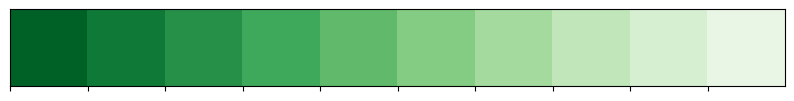

In [69]:
# Use palplot and pass in the variable:
sns.palplot(palette)

In [70]:
# Set the palette using the name of a palette:
sns.set_palette('Greens_r', 10)

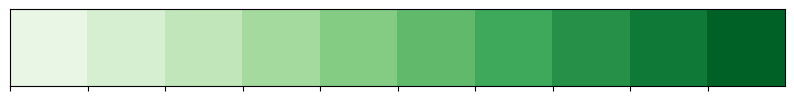

In [71]:
diverging_colors = sns.color_palette('Greens', 10)
sns.palplot(diverging_colors)

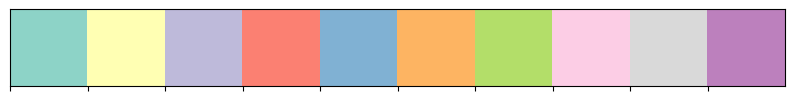

In [72]:
qualitative_colors = sns.color_palette('Set3', 10)
sns.palplot(qualitative_colors)

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

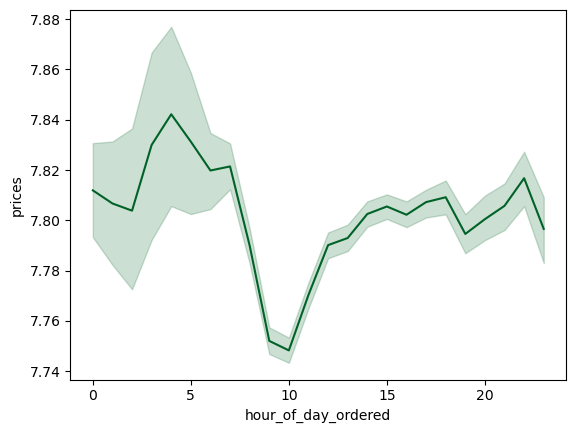

In [73]:
#Key Question #2
lineplot = sns.lineplot(data=df_ords_prods_all, x='hour_of_day_ordered', y='prices')

In [74]:
#Export the lineplot
lineplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'lineplot_hour_of_day_ordered.png'))

D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\DataAlalytics\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


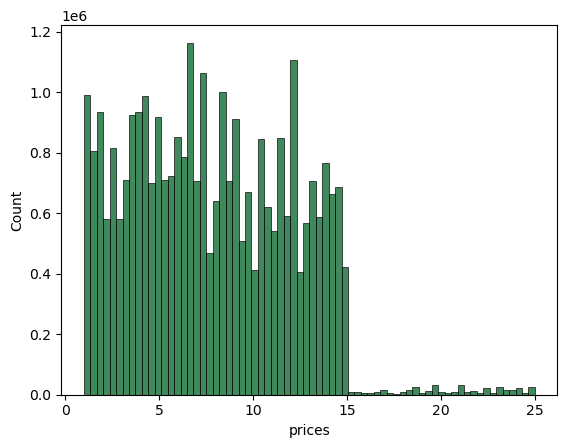

In [75]:
#Key Question #3
hist = sns.histplot(data=df_ords_prods_all, x='prices', bins=70)

In [76]:
#Export the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histplot_prices.png'))

In [77]:
#Export the dataframe as a pickle file.
df_ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_2.pkl'))